In [1]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
train= pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
feature = pd.read_csv('./features.csv')
store  = pd.read_csv('./stores.csv')

In [3]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-04-02,57258.43,False
9,1,1,2010-04-09,42960.91,False


In [4]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [5]:
feature

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,2010-03-12,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,2010-03-19,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,2010-03-26,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,2010-04-02,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,2010-04-09,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [6]:
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
merge_df=pd.merge(train,feature, on=['Store','Date'], how='inner')

In [8]:

merge_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [9]:
merge_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,150681.0,7246.420196,8291.221345,0.270,2240.270000,5347.45000,9210.900000,88646.760000
MarkDown2,111248.0,3334.628621,9475.357325,-265.760,41.600000,192.00000,1926.940000,104519.540000
MarkDown3,137091.0,1439.421384,9623.078290,-29.100,5.080000,24.60000,103.990000,141630.610000
MarkDown4,134967.0,3383.168256,6292.384031,0.220,504.220000,1481.31000,3595.040000,67474.850000
MarkDown5,151432.0,4628.975079,5962.887455,135.160,1878.440000,3359.45000,5563.800000,108519.280000


In [10]:
from datetime import datetime as dt

In [11]:
merge_df['DateTimeObj']=[dt.strptime(x,'%Y-%m-%d') for x in list(merge_df['Date'])]
merge_df['DateTimeObj'].head()

0   2010-02-05
1   2010-02-05
2   2010-02-05
3   2010-02-05
4   2010-02-05
Name: DateTimeObj, dtype: datetime64[ns]

C:\Users\akush\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


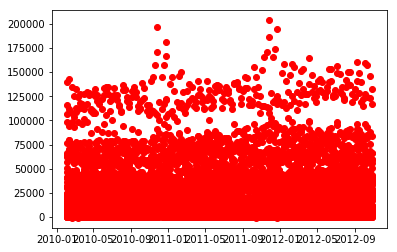

In [12]:

plt.plot(merge_df[(merge_df.Store==1)].DateTimeObj, merge_df[(merge_df.Store==1)].Weekly_Sales, 'ro')
plt.show()

In [13]:
weeklysales=merge_df.groupby(['Store','Date'])['Weekly_Sales'].apply(lambda x:np.sum(x))
weeklysales[0:5]

Store  Date      
1      2010-02-05    1643690.90
       2010-02-12    1641957.44
       2010-02-19    1611968.17
       2010-02-26    1409727.59
       2010-03-05    1554806.68
Name: Weekly_Sales, dtype: float64

In [14]:

weeklysaledept=merge_df.groupby(['Store','Dept'])['Weekly_Sales'].apply(lambda x:np.sum(x))
weeklysaledept[0:5]

Store  Dept
1      1       3219405.18
       2       6592598.93
       3       1880518.36
       4       5285874.09
       5       3468885.58
Name: Weekly_Sales, dtype: float64

In [15]:
weeklyscale=weeklysales.reset_index()
weeklyscale[0:5]

,Store,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68


In [16]:

walmartstore=pd.merge(weeklyscale, feature, on=['Store', 'Date'], how='inner')
walmartstore.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,1643690.90,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,1641957.44,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,1611968.17,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,1409727.59,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,1554806.68,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [17]:

walmartstoredf = walmartstore.iloc[:, list(range(5)) + list(range(10,13))]

In [18]:
walmartstoredf.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,True
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,False
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,False
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,False


In [19]:
walmartstoredf['DateTimeObj'] = [dt.strptime(x, '%Y-%m-%d') for x in list(walmartstoredf['Date'])]
weekNo=walmartstoredf.reset_index()    



C:\Users\akush\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
weekNo = [(x - walmartstoredf['DateTimeObj'][0]) for x in list(walmartstoredf['DateTimeObj'])]

In [21]:
walmartstoredf['Week'] = [np.timedelta64(x, 'D').astype(int)/7 for x in weekNo]


C:\Users\akush\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
walmartstoredf.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,DateTimeObj,Week
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,2010-02-05,0.0
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,True,2010-02-12,1.0
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,False,2010-02-19,2.0
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,False,2010-02-26,3.0
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,False,2010-03-05,4.0


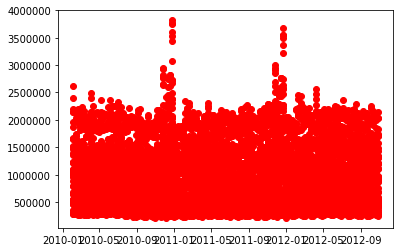

In [23]:

plt.plot(walmartstoredf.DateTimeObj, walmartstoredf.Weekly_Sales, 'ro')
plt.show()

In [24]:
walmartstoredf['IsHolidayInt'] = [int(x) for x in list(walmartstoredf.IsHoliday)]


C:\Users\akush\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
walmartstoredf.head()


,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,DateTimeObj,Week,IsHolidayInt
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,2010-02-05,0.0,0
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,True,2010-02-12,1.0,1
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,False,2010-02-19,2.0,0
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,False,2010-02-26,3.0,0
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,False,2010-03-05,4.0,0


In [26]:
walmartstoredf.Store.unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [27]:
train_WM, test_WM = train_test_split(walmartstoredf, test_size=0.3,random_state=42)


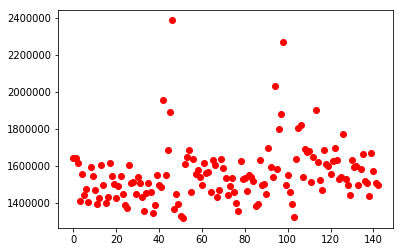

In [28]:
plt.plot(walmartstoredf[(walmartstoredf.Store==1)].Week, walmartstoredf[(walmartstoredf.Store==1)].Weekly_Sales, 'ro')
plt.show()

In [29]:

XTrain = train_WM[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Week', 'IsHolidayInt']]
YTrain = train_WM['Weekly_Sales']

In [30]:
XTest = test_WM[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Week', 'IsHolidayInt']]
YTest = test_WM['Weekly_Sales']

In [31]:
from sklearn import datasets, linear_model

In [32]:
wmLinear = linear_model.LinearRegression(normalize=True)
wmLinear.fit(XTrain, YTrain)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [33]:
wmLinear.coef_

array([  -308.15266303,  -8747.78318227,  -1668.0479916 , -45058.54212884,
         -148.87164691,  95666.79893475])

In [34]:
#Performance on the test data sets
YHatTest = wmLinear.predict(XTest)

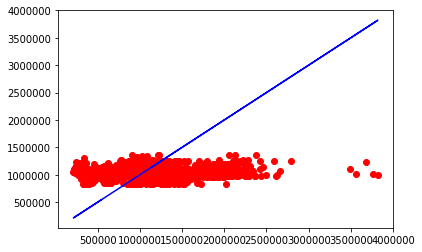

In [35]:

plt.plot(YTest, YHatTest,'ro')
plt.plot(YTest, YTest,'b-')
plt.show()

In [36]:

walmartstoredf['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [37]:
Store_Dummies = pd.get_dummies(walmartstoredf.Store, prefix='Store').iloc[:,1:]
walmartstoredf = pd.concat([walmartstoredf, Store_Dummies], axis=1)

In [38]:
walmartstoredf.head()



,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,DateTimeObj,Week,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,2010-02-05,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,True,2010-02-12,1.0,...,0,0,0,0,0,0,0,0,0,0
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,False,2010-02-19,2.0,...,0,0,0,0,0,0,0,0,0,0
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,False,2010-02-26,3.0,...,0,0,0,0,0,0,0,0,0,0
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,False,2010-03-05,4.0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
import numpy as np
from sklearn                        import metrics, svm
from sklearn.linear_model           import LogisticRegression
from sklearn import preprocessing
from sklearn import utils

In [40]:
train_WM, test_WM = train_test_split(walmartstoredf, test_size=0.3,random_state=42)
XTrain = train_WM.iloc[:,([3,4,5,6] + [9,10]) + list(range(11,walmartstoredf.shape[1]))]
yTrain = train_WM.Weekly_Sales
                                                    
XTest = test_WM.iloc[:,([3,4,5,6] + [9,10]) + list(range(11,walmartstoredf.shape[1]))]
yTest=test_WM.Weekly_Sales

In [41]:
XTrain.head()

,Temperature,Fuel_Price,CPI,Unemployment,Week,IsHolidayInt,Store_2,Store_3,Store_4,Store_5,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
1288,49.96,2.828,126.496258,9.765,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1115,65.19,3.891,225.062571,5.679,114.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
582,65.30,2.808,211.038853,6.465,10.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3647,56.94,3.851,135.265267,7.818,72.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1564,86.49,3.638,225.829306,6.334,134.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:

wmLinear = linear_model.LinearRegression(normalize=True)
wmLinear.fit(XTrain, YTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

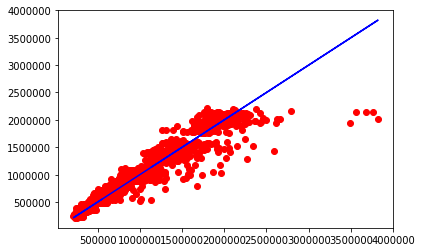

In [43]:
#Performance on the test data sets
YHatTest = wmLinear.predict(XTest)
plt.plot(YTest, YHatTest,'ro')
plt.plot(YTest, YTest,'b-')
plt.show()


In [44]:
MAPE = np.mean(abs((YTest - YHatTest)/YTest))
MSSE = np.mean(np.square(YHatTest - YTest))

print(MAPE, MSSE)

0.08956881121002612 26699670214.63536


In [45]:
# Dimensionality Reduction

In [46]:

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [47]:
alphas = np.linspace(10, 20, 10)

In [48]:
testError = np.empty(10)

for i, alpha in enumerate(alphas) :
    
    lasso = Lasso(alpha=alpha)
    lasso.fit(XTrain, YTrain)
    testError[i] = mean_squared_error(YTest, lasso.predict(XTest))

C:\Users\akush\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56023494849469.734, tolerance: 143142991402.9765
  positive)
C:\Users\akush\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55365629274480.0, tolerance: 143142991402.9765
  positive)
C:\Users\akush\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53671765333390.85, tolerance: 143142991402.9765
  positive)
C:\Users\akush\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 

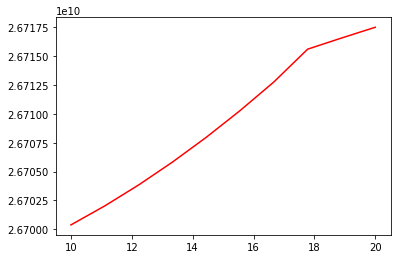

In [49]:
plt.plot(alphas, testError, 'r-')
plt.show()

In [50]:
wmLinear = linear_model.LinearRegression(normalize=True)
wmLinear

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [51]:
lasso = Lasso(alpha=17)
lasso.fit(XTrain, YTrain)

C:\Users\akush\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55237662443319.19, tolerance: 143142991402.9765
  positive)


Lasso(alpha=17, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)